In [ ]:
# https://github.com/joelgrus/data-science-from-scratch/blob/master/code/nearest_neighbors.py
'''
Doeesn´t work so well on many dimensions. 
Reduce dimensions with PCA if there are many dimensions.
'''

%matplotlib inline
from machine_learning import *
import matplotlib.pyplot as plt
import random
from linear_algebra import distance

In [3]:
cits = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [((x,y), label) for x, y, label in cits]

In [4]:
markers = {"Java": "o", "Python": "s", "R": "^",}
colors = {"Java": "r", "Python": "b", "R": "g",}

In [5]:
## Core functions

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points, key=lambda(point, _): distance(point, new_point))
    k_nearest_labels = [label for _, label in by_distance[:k]]
    return majority_vote(k_nearest_labels)

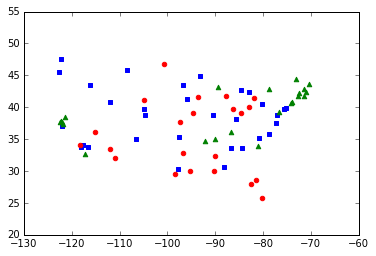

In [74]:
plots = {"Java": ([], []), "Python": ([], []), "R": ([], []),}

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
    
for language, (x,y) in plots.iteritems():
    plt.scatter(x,y, color=colors[language], marker=markers[language], label=language, zorder=10)
    
plt.axis([-130, -60, 20, 55])
plt.show()
plt.clf()


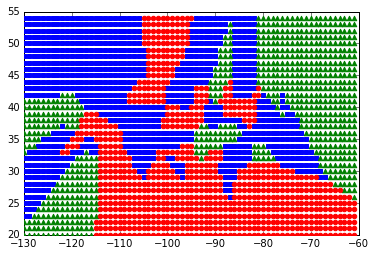

In [15]:
plots = {"Java": ([], []), "Python": ([], []), "R": ([], []),}
markers = {"Java": "o", "Python": "s", "R": "^",}
colors = {"Java": "r", "Python": "b", "R": "g",}

k=2

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)
        
        
for language, (x,y) in plots.iteritems():
    plt.scatter(x,y, color=colors[language], marker=markers[language], label=language, zorder=10)
    
plt.axis([-130, -60, 20, 55])
plt.show()


In [7]:
print knn_classify(1, cities, [50, -120])

Java
